# Vibração de sistemas com dois graus de liberdade
## Solução Analítica
### Autor: Ian Viotti




Importando as bibliotecas

In [97]:
import numpy as np
import scipy as sp
import sympy as sym
import sympy.printing as printing
from scipy import linalg
sym.init_printing()
%matplotlib notebook

Definindo as variáveis do problema

In [250]:
val_m1 = 9
val_m2 = 1
val_k1 = 24
val_k2 = 3

x0_1 = 1
dx0_1 = 0

x0_2 = 0
dx0_2 = 0

omg,m1,m2,k1,k2 = sym.symbols('omega,m1,m2,k1,k2')

M = sym.Matrix([[m1,0],[0,m2]])
K = sym.Matrix([[k1+k2, -k2],[-k2,k2]])


### Frequências Naturais

Calculando a equação característica do sistema para determinar as frequências naturais

Equações características, Determinantes da matriz de equações características


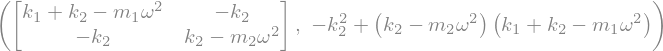

In [294]:
sys = np.dot(-omg**2,M) + K
det_sys = sym.det(sys)
nat_freq = sym.solveset(det_sys,omg)

print('Equações características, Determinantes da matriz de equações características')
sys, det_sys # Matriz com as equações características e determinante da equação característica

As frequências naturais do sistema são

Frequência Naturais [rad/s]: 


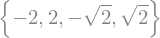

In [231]:
val_nat_freq = nat_freq.subs(m1,val_m1).subs(m2,val_m2).subs(k1,val_k1).subs(k2,val_k2)

print('Frequência Naturais [rad/s]: ')
val_nat_freq

### Modos de Vibração

Agora, para calcular os modos de vibração vamos definir os autovetores.

Caso o sistema tenha mais de 1 DOF, deve-se criar os vetores manualemente.

In [139]:
u11,u12,u21,u22 = sym.symbols('u11, u12, u21, u22')

omg1, omg2 = sym.symbols('omega_1,omega_2')

a_vet1 = sym.Matrix([[u11],[u12]])
a_vet2 = sym.Matrix([[u21],[u22]])

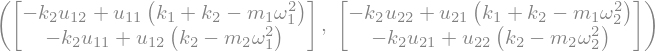

In [166]:
sys1 = (np.dot(-omg1**2,M) + K)*a_vet1
sys2 = (np.dot(-omg2**2,M) + K)*a_vet2

sys1, sys2

Determinando os valores de *u* substituindo os valores do problema.

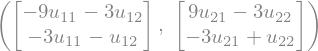

In [233]:
val_omg1 = (val_nat_freq.args[1])
val_omg2 = (val_nat_freq.args[3])


val_sys1 = sys1.subs(m1,val_m1).subs(m2,val_m2).subs(k1,val_k1).subs(k2,val_k2).subs(omg1,val_nat_freq.args[0])
val_sys2 = sys2.subs(m1,val_m1).subs(m2,val_m2).subs(k1,val_k1).subs(k2,val_k2).subs(omg2,val_nat_freq.args[2])
val_sys1, val_sys2

Os modos de vibração são definidos pelas variáveis mod1 e mod2.

Modos de vibração: 


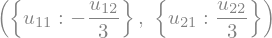

In [232]:
val_sys1 = sym.Matrix(val_sys1)
val_sys2 = sym.Matrix(val_sys2)

mod1 = sym.solve(val_sys1,(u11,u12))
mod2 = sym.solve(val_sys2,(u21,u22))

print('Modos de vibração: ')
mod1, mod2

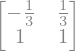

In [230]:
u1 = sym.Matrix([[mod1.get(u11).subs(u12,1)],[1]])
u2 = sym.Matrix([[mod2.get(u21).subs(u22,1)],[1]])

u = sym.Matrix([[u1, u2]])

u

## Solução no tempo

A solução do problema, com as condições iniciais $x_0$ e $ \dot{x_0}$ pode ser construída em termos dos valores de $\pm\omega_1,\pm\omega_2$ e os vetores $ u_1 $ e $ u_2$.

Assumindo que a resposta no tempo vai ter uma forma harmônica do tipo

$ x(t) = A_1 sin(\omega_1 t + \phi_1)u_1 + A_2 sin(\omega_2 t + \phi_2)u_2  $

Considerando que nenhum $ \omega_i $ é nulo.

Para solucionar o problema acima, a equação é escrita na forma


$
\begin{bmatrix}
x_1(t)\\ 
x_2(t)
\end{bmatrix} = \begin{bmatrix}
u_1 &  u_2
\end{bmatrix}
\begin{bmatrix}
A_1 sin(\omega_1 t + \phi_1) \\
A_2 sin(\omega_2 t + \phi_2) \\ 
\end{bmatrix}
$

Posição [m], Velocidade [m/s]


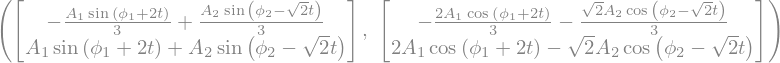

In [279]:
A1, A2, phi1, phi2, t = sym.symbols('A1,A2,phi1,phi2, t')

func = sym.Matrix([[A1*sym.sin(val_omg1*t + phi1)],[A2*sym.sin(val_omg2*t+phi2)]])
x_t = u*func
dx_t = sym.diff(x_t,t)

print('Posição [m], Velocidade [m/s]')
x_t, dx_t

Definindo as condições iniciais.

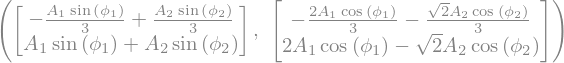

In [282]:
vet_x_0 = sym.Matrix([[x0_1],[x0_2]])
vet_dx_0 = sym.Matrix([[dx0_1],[dx0_2]])

x_0, dx_0

Em $t=0s$

Posição [m] (t=0), Velocidade [m/s] (t=0)


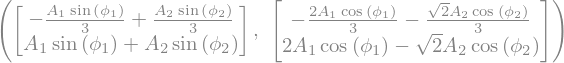

In [283]:
x_0 = x_t.subs(t,0) 
dx_0 = dx_t.subs(t,0)

print('Posição [m] (t=0), Velocidade [m/s] (t=0)')
x_0, dx_0

Igualando as condições iniciais com as funções x_0 e dx_0 obtemos as seguintes equações

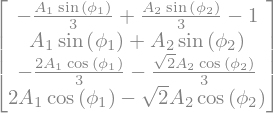

In [293]:
sol_x = x_0 - vet_x_0
sol_dx = dx_0 - vet_dx_0

sol_eqtns = sym.Matrix([[sol_x],[sol_dx]]) 

vals = sym.solve(sol_eqns, (A1,A2,phi1,phi2))

sol_eqtns

#### Feito

## Autovalores e Autovetores
O mesmo problema pode ser solucionado usando os autovalores e autovetores

In [ ]:
mod1 = sym.solve(sys1,(u11,u12))
mod1

mod2 = sym.solve(sys2,(u21,u22))
mod2

In [61]:
help(sym.symbols)

Help on function symbols in module sympy.core.symbol:

symbols(names, **args)
    Transform strings into instances of :class:`Symbol` class.
    
    :func:`symbols` function returns a sequence of symbols with names taken
    from ``names`` argument, which can be a comma or whitespace delimited
    string, or a sequence of strings::
    
        >>> from sympy import symbols, Function
    
        >>> x, y, z = symbols('x,y,z')
        >>> a, b, c = symbols('a b c')
    
    The type of output is dependent on the properties of input arguments::
    
        >>> symbols('x')
        x
        >>> symbols('x,')
        (x,)
        >>> symbols('x,y')
        (x, y)
        >>> symbols(('a', 'b', 'c'))
        (a, b, c)
        >>> symbols(['a', 'b', 'c'])
        [a, b, c]
        >>> symbols({'a', 'b', 'c'})
        {a, b, c}
    
    If an iterable container is needed for a single symbol, set the ``seq``
    argument to ``True`` or terminate the symbol name with a comma::
    
        